In [82]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import math
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [83]:
df = pd.read_csv("phoneprices.csv")

df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [84]:
x = df.iloc[:,:-1]

x_normalized = (x - x.min()) / (x.max() - x.min())

x_normalized

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


In [85]:
y = pd.get_dummies(df.iloc[:,-1], prefix='y')

y

,y_0,y_1,y_2,y_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
1995,1,0,0,0
1996,0,0,1,0
1997,0,0,0,1
1998,1,0,0,0


In [86]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.3)

len_input = len(x_train.columns)
len_output = len(y_train.columns)

print("Len Input: {}".format(len_input))
print("Len Output: {}".format(len_output))

Len Input: 20
Len Output: 4


In [87]:
class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
        self.n_samples = len(x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

In [88]:
def one_hot_encoding(nd_array):
    one_hot_encoding_predictions = nd_array

    for i in range(len(nd_array)):
        max_pred = max(nd_array[i])

        for j in range(len(nd_array[i])):
            one_hot_encoding_predictions[i][j] = 1 if nd_array[i][j] == max_pred else 0

    return one_hot_encoding_predictions

In [89]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()

        self.input_1 = nn.Linear(input_dim, 10)
        self.output = nn.Linear(10, output_dim)

    def forward(self, x):
        # f(x) = a(f(x))
        x = F.relu(self.input_1(x))
        x = torch.sigmoid(self.output(x))
        y = F.softmax(x, dim=-1)

        return y

model = MultiLayerPerceptron(len_input, len_output)

In [90]:
def train_fn(loader, model, optimizer, loss_fn, device):
    loop = tqdm(loader)

    average_loss = 0
    count = 0
    
    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # Forward
        predictions = model.forward(data)
        
        predictions = F.softmax(predictions, dim=-1)
        
        loss = loss_fn(predictions, targets)
        
        # Backward
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        # Update tqdm
        loop.set_postfix(loss=loss.item())

        average_loss += loss.item()
        count += 1
    
    average_loss = average_loss / count

    return average_loss

In [91]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 254 trainable parameters


In [92]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

device = 'cpu'
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

batch_size = 5

epochs = 100

In [93]:
x_train = torch.tensor(x_train.values).float().to(device)
y_train = torch.tensor(y_train.values).float().to(device)

x_test = torch.tensor(x_test.values).float().to(device)
y_test = torch.tensor(y_test.values).float().to(device)

training_ds = CustomDataset(x_train, y_train)

train_loader = DataLoader(
    training_ds,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

torch.Size([1400, 20])
torch.Size([1400, 4])
torch.Size([600, 20])
torch.Size([600, 4])


In [94]:
# Convert y_test to numpy array
y_test = y_test.detach().cpu().numpy()

# Array to store the losses
losses = []

# Array to store accuracy score
accuracies = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    average_loss = train_fn(train_loader, model, optimizer, criterion, device)

    # Perform a prediction at every epoch
    one_hot_encoding_predictions = one_hot_encoding(
        model.forward(x_test).detach().cpu().numpy()
    )

    print(one_hot_encoding)

    # Get the accuracy at every epoch
    acc_score = accuracy_score(
        y_test,
        one_hot_encoding_predictions
    )

    losses.append(average_loss)

    accuracies.append(acc_score)

    print("Average Loss: {}".format(average_loss))
    print("Acc Score: {}".format(acc_score))

Epoch: 0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 421.28it/s, loss=1.38]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3780635080167225
Acc Score: 0.6066666666666667
Epoch: 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 536.41it/s, loss=1.36]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.36243996322155
Acc Score: 0.46
Epoch: 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 549.73it/s, loss=1.36]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3579219051769802
Acc Score: 0.465
Epoch: 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 461.94it/s, loss=1.36]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3561031196798596
Acc Score: 0.4666666666666667
Epoch: 4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 446.91it/s, loss=1.36]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3550979052271162
Acc Score: 0.4683333333333333
Epoch: 5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 427.25it/s, loss=1.36]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3544364064931869
Acc Score: 0.47
Epoch: 6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 480.65it/s, loss=1.35]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.353946595958301
Acc Score: 0.47
Epoch: 7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 430.94it/s, loss=1.35]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3535408356360026
Acc Score: 0.47
Epoch: 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 447.20it/s, loss=1.35]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3531948055539813
Acc Score: 0.47
Epoch: 9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 396.24it/s, loss=1.35]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3528946557215282
Acc Score: 0.47
Epoch: 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 451.05it/s, loss=1.35]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3526473773377283
Acc Score: 0.47
Epoch: 11


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 451.31it/s, loss=1.35]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3524377520595279
Acc Score: 0.47
Epoch: 12


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 384.83it/s, loss=1.35]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3522529870271682
Acc Score: 0.47
Epoch: 13


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 380.00it/s, loss=1.35]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3520950598376138
Acc Score: 0.47
Epoch: 14


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 450.64it/s, loss=1.35]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.351950176698821
Acc Score: 0.4716666666666667
Epoch: 15


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 475.15it/s, loss=1.35]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.351819384949548
Acc Score: 0.48
Epoch: 16


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 470.20it/s, loss=1.35]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3513238119227546
Acc Score: 0.645
Epoch: 17


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 404.14it/s, loss=1.34]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3489988616534643
Acc Score: 0.6416666666666667
Epoch: 18


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 435.12it/s, loss=1.34]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3463628875357765
Acc Score: 0.6566666666666666
Epoch: 19


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 497.56it/s, loss=1.34]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3445659603391376
Acc Score: 0.665
Epoch: 20


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 504.26it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3434908768960407
Acc Score: 0.6733333333333333
Epoch: 21


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 492.30it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.342714245404516
Acc Score: 0.6733333333333333
Epoch: 22


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 442.43it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3421857629503522
Acc Score: 0.6633333333333333
Epoch: 23


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 458.65it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3417916966336114
Acc Score: 0.6683333333333333
Epoch: 24


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 459.62it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3414527484348842
Acc Score: 0.665
Epoch: 25


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 477.29it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.341139841079712
Acc Score: 0.67
Epoch: 26


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 463.78it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3409158242600305
Acc Score: 0.68
Epoch: 27


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 488.34it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.34068945986884
Acc Score: 0.6816666666666666
Epoch: 28


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 426.64it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3404996088572911
Acc Score: 0.6783333333333333
Epoch: 29


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 472.29it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3404170806918825
Acc Score: 0.6766666666666666
Epoch: 30


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 392.55it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3401249783379692
Acc Score: 0.685
Epoch: 31


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 432.57it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.340061548777989
Acc Score: 0.6816666666666666
Epoch: 32


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 433.04it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.340063520840236
Acc Score: 0.69
Epoch: 33


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 469.73it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.339955089347703
Acc Score: 0.6966666666666667
Epoch: 34


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 450.28it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3396865316799709
Acc Score: 0.69
Epoch: 35


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 436.02it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3395677311079843
Acc Score: 0.6933333333333334
Epoch: 36


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 457.24it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3393226955618178
Acc Score: 0.695
Epoch: 37


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 471.10it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3391807432685578
Acc Score: 0.68
Epoch: 38


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 508.51it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3393055332558497
Acc Score: 0.6866666666666666
Epoch: 39


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 490.00it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3392481416463853
Acc Score: 0.6966666666666667
Epoch: 40


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 458.89it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3393265736954554
Acc Score: 0.69
Epoch: 41


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 437.68it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3390518626996448
Acc Score: 0.6833333333333333
Epoch: 42


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 482.90it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3390049849237715
Acc Score: 0.6883333333333334
Epoch: 43


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 452.97it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3389179587364197
Acc Score: 0.6933333333333334
Epoch: 44


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 424.70it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3387699310268675
Acc Score: 0.685
Epoch: 45


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 454.27it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3388169126851217
Acc Score: 0.6833333333333333
Epoch: 46


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 407.29it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3388461313077382
Acc Score: 0.6883333333333334
Epoch: 47


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 441.80it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.338757374882698
Acc Score: 0.6983333333333334
Epoch: 48


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 470.46it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3387109654290335
Acc Score: 0.6916666666666667
Epoch: 49


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 466.93it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3387060829571316
Acc Score: 0.675
Epoch: 50


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 449.20it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3384352164609092
Acc Score: 0.6716666666666666
Epoch: 51


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 429.26it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.338476572717939
Acc Score: 0.69
Epoch: 52


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 438.64it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3387103923729489
Acc Score: 0.685
Epoch: 53


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 417.35it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3384956070355007
Acc Score: 0.6916666666666667
Epoch: 54


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 402.73it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3382416657039098
Acc Score: 0.685
Epoch: 55


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 452.06it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3382706429277147
Acc Score: 0.6833333333333333
Epoch: 56


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 448.09it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3381409862211773
Acc Score: 0.685
Epoch: 57


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 458.78it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3386274171727044
Acc Score: 0.7
Epoch: 58


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 430.39it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.338266044003623
Acc Score: 0.6883333333333334
Epoch: 59


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 454.95it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3383534252643585
Acc Score: 0.6983333333333334
Epoch: 60


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 443.09it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3378639489412307
Acc Score: 0.6966666666666667
Epoch: 61


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 467.25it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3385666749307088
Acc Score: 0.6866666666666666
Epoch: 62


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 467.24it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.338610542672021
Acc Score: 0.7
Epoch: 63


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 482.57it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3383547565766742
Acc Score: 0.7
Epoch: 64


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 464.82it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3381817413227899
Acc Score: 0.69
Epoch: 65


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 390.93it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3380164610488074
Acc Score: 0.68
Epoch: 66


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 402.55it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3379822833197457
Acc Score: 0.6966666666666667
Epoch: 67


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 426.41it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3382336867707116
Acc Score: 0.6816666666666666
Epoch: 68


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 422.82it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3381614425352641
Acc Score: 0.685
Epoch: 69


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 346.26it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.338305675131934
Acc Score: 0.7016666666666667
Epoch: 70


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 435.69it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3386597420488084
Acc Score: 0.6833333333333333
Epoch: 71


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 451.83it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3381600499153137
Acc Score: 0.69
Epoch: 72


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 425.41it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3383304859910692
Acc Score: 0.6933333333333334
Epoch: 73


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 410.20it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3379629514047078
Acc Score: 0.68
Epoch: 74


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 468.58it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3377462242330824
Acc Score: 0.69
Epoch: 75


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 469.25it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3380779589925493
Acc Score: 0.6916666666666667
Epoch: 76


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 403.55it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3380337455442974
Acc Score: 0.6833333333333333
Epoch: 77


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 477.09it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3375589162111283
Acc Score: 0.6916666666666667
Epoch: 78


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 421.47it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3378461948462894
Acc Score: 0.695
Epoch: 79


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 444.92it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.337698539665767
Acc Score: 0.6883333333333334
Epoch: 80


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 457.21it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3380297971623285
Acc Score: 0.6916666666666667
Epoch: 81


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 400.05it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3379592520850045
Acc Score: 0.7
Epoch: 82


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 447.15it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.33796842949731
Acc Score: 0.7016666666666667
Epoch: 83


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 441.90it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3384087537016187
Acc Score: 0.6833333333333333
Epoch: 84


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 403.95it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3378547246967043
Acc Score: 0.6866666666666666
Epoch: 85


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 412.24it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3382987963301796
Acc Score: 0.6983333333333334
Epoch: 86


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 471.47it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3377239691359657
Acc Score: 0.6766666666666666
Epoch: 87


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 444.82it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3376625691141402
Acc Score: 0.7033333333333334
Epoch: 88


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 454.75it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3376758009195329
Acc Score: 0.705
Epoch: 89


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 469.18it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3376362025737762
Acc Score: 0.68
Epoch: 90


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 505.09it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.338362386396953
Acc Score: 0.69
Epoch: 91


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 470.78it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3381653257778712
Acc Score: 0.7
Epoch: 92


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 476.66it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3383346425635474
Acc Score: 0.6983333333333334
Epoch: 93


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 452.99it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3380768605640956
Acc Score: 0.695
Epoch: 94


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 449.20it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3375531652144024
Acc Score: 0.6966666666666667
Epoch: 95


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 460.10it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.337441834807396
Acc Score: 0.69
Epoch: 96


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 413.04it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3378775864839554
Acc Score: 0.6966666666666667
Epoch: 97


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 345.12it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3382464485509056
Acc Score: 0.6966666666666667
Epoch: 98


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 415.48it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.337516749756677
Acc Score: 0.6933333333333334
Epoch: 99


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 425.21it/s, loss=1.33]


<function one_hot_encoding at 0x7f3349671870>
Average Loss: 1.3377991046224322
Acc Score: 0.6783333333333333


In [95]:
predictions = model.forward(x_test)

print(predictions.shape)

torch.Size([600, 4])


In [96]:
one_hot_encoding_predictions = one_hot_encoding(predictions.detach().cpu( ).numpy())

one_hot_encoding_predictions

array([[0., 0., 0., 1.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [97]:
accuracy = accuracy_score(y_test, one_hot_encoding_predictions)

print("Accuracy: {}".format(accuracy))

Accuracy: 0.6783333333333333


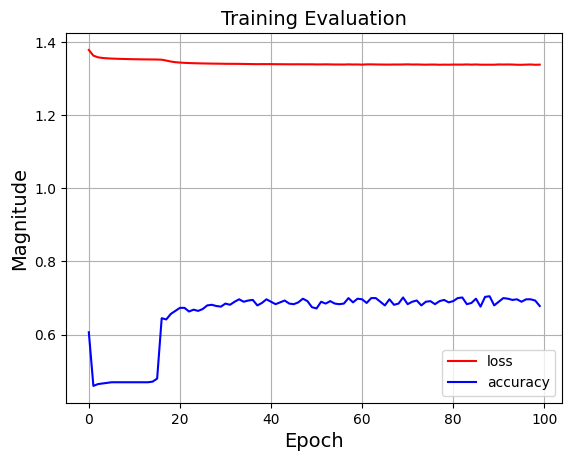

In [98]:
plt.plot(losses, label='loss', color='red')
plt.plot(accuracies, label='accuracy', color='blue')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()